In [178]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# let's see all the columns
pd.set_option('display.max_columns', 75)
pd.set_option('display.min_rows', 10)

1. Frame the problem and look at the big picture.
2. Get the data.
3. Explore the data to gain insights.
4. Prepare the data to better expose the underlying data patterns to machine learning
algorithms.
5. Explore many different models and shortlist the best ones.
6. Fine-tune your models and combine them into a great solution.
7. Present your solution.
8. Launch, monitor, and maintain your system.

## Frame the problem and look at the big picture

Guessing the winner of the game with the help of dataset we have on our hand.

# Get the Data

In [3]:
df = pd.read_csv('games.csv')
df.head()

,gameId,creationTime,gameDuration,seasonId,winner,firstBlood,firstTower,firstInhibitor,firstBaron,firstDragon,firstRiftHerald,t1_champ1id,t1_champ1_sum1,t1_champ1_sum2,t1_champ2id,t1_champ2_sum1,t1_champ2_sum2,t1_champ3id,t1_champ3_sum1,t1_champ3_sum2,t1_champ4id,t1_champ4_sum1,t1_champ4_sum2,t1_champ5id,t1_champ5_sum1,t1_champ5_sum2,t1_towerKills,t1_inhibitorKills,t1_baronKills,t1_dragonKills,t1_riftHeraldKills,t1_ban1,t1_ban2,t1_ban3,t1_ban4,t1_ban5,t2_champ1id,t2_champ1_sum1,t2_champ1_sum2,t2_champ2id,t2_champ2_sum1,t2_champ2_sum2,t2_champ3id,t2_champ3_sum1,t2_champ3_sum2,t2_champ4id,t2_champ4_sum1,t2_champ4_sum2,t2_champ5id,t2_champ5_sum1,t2_champ5_sum2,t2_towerKills,t2_inhibitorKills,t2_baronKills,t2_dragonKills,t2_riftHeraldKills,t2_ban1,t2_ban2,t2_ban3,t2_ban4,t2_ban5
0,3326086514,1504279457970,1949,9,1,2,1,1,1,1,2,8,12,4,432,3,4,96,4,7,11,11,6,112,4,14,11,1,2,3,0,92,40,69,119,141,104,11,4,498,4,7,122,6,4,238,14,4,412,4,3,5,0,0,1,1,114,67,43,16,51
1,3229566029,1497848803862,1851,9,1,1,1,1,0,1,1,119,7,4,39,12,4,76,4,3,10,4,14,35,4,11,10,4,0,2,1,51,122,17,498,19,54,4,12,25,4,14,120,11,4,157,4,14,92,4,7,2,0,0,0,0,11,67,238,51,420
2,3327363504,1504360103310,1493,9,1,2,1,1,1,2,0,18,4,7,141,11,4,267,3,4,68,4,12,38,12,4,8,1,1,1,0,117,40,29,16,53,69,4,7,412,14,4,126,4,12,24,4,11,22,7,4,2,0,0,1,0,157,238,121,57,28
3,3326856598,1504348503996,1758,9,1,1,1,1,1,1,0,57,4,12,63,4,14,29,4,7,61,4,1,36,11,4,9,2,1,2,0,238,67,516,114,31,90,14,4,19,11,4,412,4,3,92,4,14,22,4,7,0,0,0,0,0,164,18,141,40,51
4,3330080762,1504554410899,2094,9,1,2,1,1,1,1,0,19,4,12,29,11,4,40,4,3,119,4,7,134,7,4,9,2,1,3,0,90,64,412,25,31,37,3,4,59,4,12,141,11,4,38,4,12,51,4,7,3,0,0,1,0,86,11,201,122,18


In [4]:
jDict = pd.read_json('champion_info_2.json')
champInfo = pd.read_json((jDict['data']).to_json(), orient='index')
champInfo.shape

(139, 5)

In [6]:
df["seasonId"].value_counts() 
# since we have only one season, we can drop this column
df.drop("seasonId", axis=1, inplace=True)

# Explore the Data 

In [7]:
# Creating a copy of the dataframe to work on
df_exp = df.copy()

In [159]:
# let's check the non-null values

df.isnull().sum()

gameId                0
creationTime          0
gameDuration          0
winner                0
firstBlood            0
firstTower            0
firstInhibitor        0
firstBaron            0
firstDragon           0
firstRiftHerald       0
t1_champ1id           0
t1_champ1_sum1        0
t1_champ1_sum2        0
t1_champ2id           0
t1_champ2_sum1        0
t1_champ2_sum2        0
t1_champ3id           0
t1_champ3_sum1        0
t1_champ3_sum2        0
t1_champ4id           0
t1_champ4_sum1        0
t1_champ4_sum2        0
t1_champ5id           0
t1_champ5_sum1        0
t1_champ5_sum2        0
t1_towerKills         0
t1_inhibitorKills     0
t1_baronKills         0
t1_dragonKills        0
t1_riftHeraldKills    0
t1_ban1               0
t1_ban2               0
t1_ban3               0
t1_ban4               0
t1_ban5               0
t2_champ1id           0
t2_champ1_sum1        0
t2_champ1_sum2        0
t2_champ2id           0
t2_champ2_sum1        0
t2_champ2_sum2        0
t2_champ3id     

In [9]:
df_exp.shape

(51490, 60)

In [10]:
df_exp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51490 entries, 0 to 51489
Data columns (total 60 columns):
 #   Column              Non-Null Count  Dtype
---  ------              --------------  -----
 0   gameId              51490 non-null  int64
 1   creationTime        51490 non-null  int64
 2   gameDuration        51490 non-null  int64
 3   winner              51490 non-null  int64
 4   firstBlood          51490 non-null  int64
 5   firstTower          51490 non-null  int64
 6   firstInhibitor      51490 non-null  int64
 7   firstBaron          51490 non-null  int64
 8   firstDragon         51490 non-null  int64
 9   firstRiftHerald     51490 non-null  int64
 10  t1_champ1id         51490 non-null  int64
 11  t1_champ1_sum1      51490 non-null  int64
 12  t1_champ1_sum2      51490 non-null  int64
 13  t1_champ2id         51490 non-null  int64
 14  t1_champ2_sum1      51490 non-null  int64
 15  t1_champ2_sum2      51490 non-null  int64
 16  t1_champ3id         51490 non-null  int6

In [160]:
df_exp.columns

Index(['gameId', 'creationTime', 'gameDuration', 'winner', 'firstBlood',
       'firstTower', 'firstInhibitor', 'firstBaron', 'firstDragon',
       'firstRiftHerald', 't1_champ1id', 't1_champ1_sum1', 't1_champ1_sum2',
       't1_champ2id', 't1_champ2_sum1', 't1_champ2_sum2', 't1_champ3id',
       't1_champ3_sum1', 't1_champ3_sum2', 't1_champ4id', 't1_champ4_sum1',
       't1_champ4_sum2', 't1_champ5id', 't1_champ5_sum1', 't1_champ5_sum2',
       't1_towerKills', 't1_inhibitorKills', 't1_baronKills', 't1_dragonKills',
       't1_riftHeraldKills', 't1_ban1', 't1_ban2', 't1_ban3', 't1_ban4',
       't1_ban5', 't2_champ1id', 't2_champ1_sum1', 't2_champ1_sum2',
       't2_champ2id', 't2_champ2_sum1', 't2_champ2_sum2', 't2_champ3id',
       't2_champ3_sum1', 't2_champ3_sum2', 't2_champ4id', 't2_champ4_sum1',
       't2_champ4_sum2', 't2_champ5id', 't2_champ5_sum1', 't2_champ5_sum2',
       't2_towerKills', 't2_inhibitorKills', 't2_baronKills', 't2_dragonKills',
       't2_riftHeraldKills', '

In [161]:
champInfo.head()

,tags,title,key,name
id,,,,
266,"[Fighter, Tank]",the Darkin Blade,Aatrox,Aatrox
103,"[Mage, Assassin]",the Nine-Tailed Fox,Ahri,Ahri
84,[Assassin],the Fist of Shadow,Akali,Akali
12,"[Tank, Support]",the Minotaur,Alistar,Alistar
32,"[Tank, Mage]",the Sad Mummy,Amumu,Amumu


In [162]:
champsid_only = ["t1_champ1id","t1_champ2id", "t1_champ3id", "t1_champ4id", "t1_champ5id", "t2_champ1id", "t2_champ2id", "t2_champ3id", "t2_champ4id", "t2_champ5id"]
df_exp[champsid_only].head()

,t1_champ1id,t1_champ2id,t1_champ3id,t1_champ4id,t1_champ5id,t2_champ1id,t2_champ2id,t2_champ3id,t2_champ4id,t2_champ5id
0,8,432,96,11,112,104,498,122,238,412
1,119,39,76,10,35,54,25,120,157,92
2,18,141,267,68,38,69,412,126,24,22
3,57,63,29,61,36,90,19,412,92,22
4,19,29,40,119,134,37,59,141,38,51


In [12]:
df_exp["t1_champ1id"].value_counts().sum()

51490

In [163]:
champsid_only = ["t1_champ1id","t1_champ2id", "t1_champ3id", "t1_champ4id", "t1_champ5id", "t2_champ1id", "t2_champ2id", "t2_champ3id", "t2_champ4id", "t2_champ5id"]

# let's add all the picks of the teams
most_picked_champs = df_exp[champsid_only].stack().value_counts()
most_picked_champs.nlargest(10)

412    13002
18     12983
67     10658
141     9853
64      9188
29      8838
40      8691
236     8300
202     8044
222     7980
dtype: int64

In [33]:
champInfo

,tags,title,id,key,name
Aatrox,"[Fighter, Tank]",the Darkin Blade,266,Aatrox,Aatrox
Ahri,"[Mage, Assassin]",the Nine-Tailed Fox,103,Ahri,Ahri
Akali,[Assassin],the Fist of Shadow,84,Akali,Akali
Alistar,"[Tank, Support]",the Minotaur,12,Alistar,Alistar
Amumu,"[Tank, Mage]",the Sad Mummy,32,Amumu,Amumu
...,...,...,...,...,...
Zac,"[Tank, Fighter]",the Secret Weapon,154,Zac,Zac
Zed,"[Assassin, Fighter]",the Master of Shadows,238,Zed,Zed
Ziggs,[Mage],the Hexplosives Expert,115,Ziggs,Ziggs
Zilean,"[Support, Mage]",the Chronokeeper,26,Zilean,Zilean


In [34]:
most_picked_champs

412    13002
18     12983
67     10658
141     9853
64      9188
       ...  
13      1032
30      1007
136      841
266      753
72       574
Length: 138, dtype: int64

In [38]:
most_picked_champs = most_picked_champs.to_frame().reset_index()
most_picked_champs.columns = ['id', 'count']
most_picked_champs

,id,count
0,412,13002
1,18,12983
2,67,10658
3,141,9853
4,64,9188
...,...,...
133,13,1032
134,30,1007
135,136,841
136,266,753


In [39]:
merged_most_picked = pd.merge(most_picked_champs, champInfo, on='id')
merged_most_picked

,id,count,tags,title,key,name
0,412,13002,"[Support, Fighter]",the Chain Warden,Thresh,Thresh
1,18,12983,"[Marksman, Assassin]",the Yordle Gunner,Tristana,Tristana
2,67,10658,"[Marksman, Assassin]",the Night Hunter,Vayne,Vayne
3,141,9853,"[Fighter, Assassin]",the Shadow Reaper,Kayn,Kayn
4,64,9188,"[Fighter, Assassin]",the Blind Monk,LeeSin,Lee Sin
...,...,...,...,...,...,...
133,13,1032,"[Mage, Fighter]",the Rune Mage,Ryze,Ryze
134,30,1007,[Mage],the Deathsinger,Karthus,Karthus
135,136,841,"[Mage, Fighter]",The Star Forger,AurelionSol,Aurelion Sol
136,266,753,"[Fighter, Tank]",the Darkin Blade,Aatrox,Aatrox


In [40]:
merged_most_picked.drop(["title", "key"], inplace=True, axis=1)

In [41]:
merged_most_picked.nlargest(10, "count")

,id,count,tags,name
0,412,13002,"[Support, Fighter]",Thresh
1,18,12983,"[Marksman, Assassin]",Tristana
2,67,10658,"[Marksman, Assassin]",Vayne
3,141,9853,"[Fighter, Assassin]",Kayn
4,64,9188,"[Fighter, Assassin]",Lee Sin
5,29,8838,"[Marksman, Assassin]",Twitch
6,40,8691,"[Support, Mage]",Janna
7,236,8300,[Marksman],Lucian
8,202,8044,"[Marksman, Assassin]",Jhin
9,222,7980,[Marksman],Jinx


In [42]:
merged_most_picked["count"].sum()

514900

Text(0.5, 1.0, '10-Most Picked Champions')

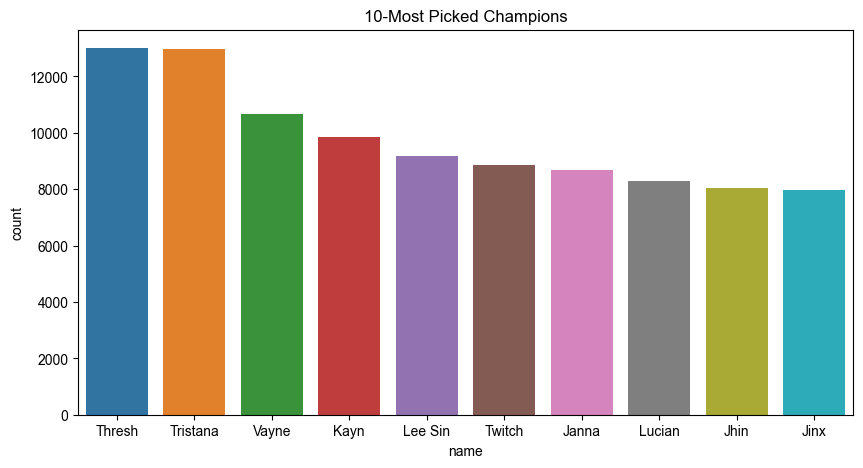

In [43]:
plt.figure(figsize=(10,5))
sns.barplot(x="name", y="count", data=merged_most_picked.nlargest(10, "count"))
sns.set_style("darkgrid")
plt.title("10-Most Picked Champions")

### How about the portion of each team's win? 

In [171]:
winner_portion =  df_exp["winner"].value_counts().reset_index()
winner_portion

,index,winner
0,1,26077
1,2,25413


In [172]:
winner_portion["index"] =  winner_portion["index"].map({1: "Blue", 2: "Red"})
winner_portion.rename(columns={"index": "Team", "winner": "Count"}, inplace=True)
winner_portion

,Team,Count
0,Blue,26077
1,Red,25413


In [146]:
winner_portion["Count"] = round(winner_portion["Count"]/winner_portion["Count"].sum() * 100,1)
winner_portion

,Team,Count
0,Blue,50.6
1,Red,49.4


[Text(0, 3, '50.6%'), Text(0, 3, '49.4%')]

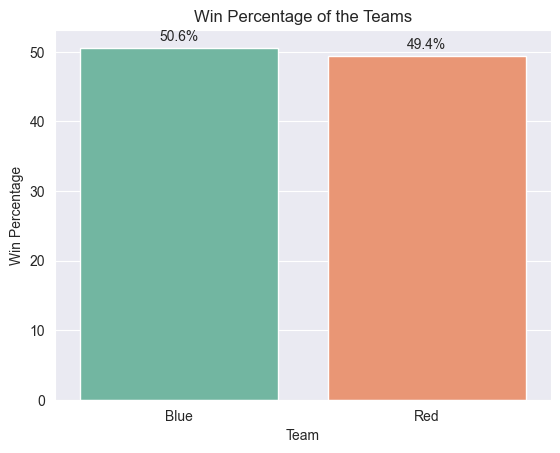

In [151]:
ax = sns.barplot(x="Team", y="Count", data=winner_portion, palette="Set2")

ax.set_title("Win Percentage of the Teams")
ax.set_xlabel("Team")
ax.set_ylabel("Win Percentage")
ax.bar_label(ax.containers[0], fmt='%.1f%%', padding=3)

In [152]:
# It is pretty even but blue team has a slight advantage over red team.

In [153]:
df_exp.head()

,gameId,creationTime,gameDuration,winner,firstBlood,firstTower,firstInhibitor,firstBaron,firstDragon,firstRiftHerald,t1_champ1id,t1_champ1_sum1,t1_champ1_sum2,t1_champ2id,t1_champ2_sum1,t1_champ2_sum2,t1_champ3id,t1_champ3_sum1,t1_champ3_sum2,t1_champ4id,t1_champ4_sum1,t1_champ4_sum2,t1_champ5id,t1_champ5_sum1,t1_champ5_sum2,t1_towerKills,t1_inhibitorKills,t1_baronKills,t1_dragonKills,t1_riftHeraldKills,t1_ban1,t1_ban2,t1_ban3,t1_ban4,t1_ban5,t2_champ1id,t2_champ1_sum1,t2_champ1_sum2,t2_champ2id,t2_champ2_sum1,t2_champ2_sum2,t2_champ3id,t2_champ3_sum1,t2_champ3_sum2,t2_champ4id,t2_champ4_sum1,t2_champ4_sum2,t2_champ5id,t2_champ5_sum1,t2_champ5_sum2,t2_towerKills,t2_inhibitorKills,t2_baronKills,t2_dragonKills,t2_riftHeraldKills,t2_ban1,t2_ban2,t2_ban3,t2_ban4,t2_ban5
0,3326086514,1504279457970,1949,1,2,1,1,1,1,2,8,12,4,432,3,4,96,4,7,11,11,6,112,4,14,11,1,2,3,0,92,40,69,119,141,104,11,4,498,4,7,122,6,4,238,14,4,412,4,3,5,0,0,1,1,114,67,43,16,51
1,3229566029,1497848803862,1851,1,1,1,1,0,1,1,119,7,4,39,12,4,76,4,3,10,4,14,35,4,11,10,4,0,2,1,51,122,17,498,19,54,4,12,25,4,14,120,11,4,157,4,14,92,4,7,2,0,0,0,0,11,67,238,51,420
2,3327363504,1504360103310,1493,1,2,1,1,1,2,0,18,4,7,141,11,4,267,3,4,68,4,12,38,12,4,8,1,1,1,0,117,40,29,16,53,69,4,7,412,14,4,126,4,12,24,4,11,22,7,4,2,0,0,1,0,157,238,121,57,28
3,3326856598,1504348503996,1758,1,1,1,1,1,1,0,57,4,12,63,4,14,29,4,7,61,4,1,36,11,4,9,2,1,2,0,238,67,516,114,31,90,14,4,19,11,4,412,4,3,92,4,14,22,4,7,0,0,0,0,0,164,18,141,40,51
4,3330080762,1504554410899,2094,1,2,1,1,1,1,0,19,4,12,29,11,4,40,4,3,119,4,7,134,7,4,9,2,1,3,0,90,64,412,25,31,37,3,4,59,4,12,141,11,4,38,4,12,51,4,7,3,0,0,1,0,86,11,201,122,18


In [174]:
df_exp["game_duration_min"] = round(df_exp["gameDuration"] / 60)
df_exp["game_duration_min"].value_counts()

31.0    2773
29.0    2736
30.0    2711
28.0    2666
32.0    2648
27.0    2436
34.0    2385
33.0    2369
26.0    2275
35.0    2152
25.0    2086
36.0    1988
24.0    1847
37.0    1749
38.0    1711
23.0    1674
22.0    1498
21.0    1325
39.0    1325
40.0    1246
3.0     1074
20.0    1046
41.0    1023
42.0     875
43.0     657
16.0     622
44.0     617
19.0     539
45.0     451
46.0     386
15.0     331
18.0     290
47.0     286
17.0     281
48.0     236
49.0     188
50.0     165
51.0     153
52.0     122
4.0      121
53.0      75
54.0      61
55.0      54
14.0      35
57.0      35
56.0      31
13.0      21
58.0      16
11.0      14
59.0      13
12.0      11
60.0      11
10.0       9
62.0       8
61.0       6
66.0       5
64.0       4
63.0       3
68.0       3
9.0        3
70.0       2
65.0       2
69.0       1
8.0        1
79.0       1
67.0       1
76.0       1
Name: game_duration_min, dtype: int64

Text(0.5, 1.0, 'Game Duration Distribution')

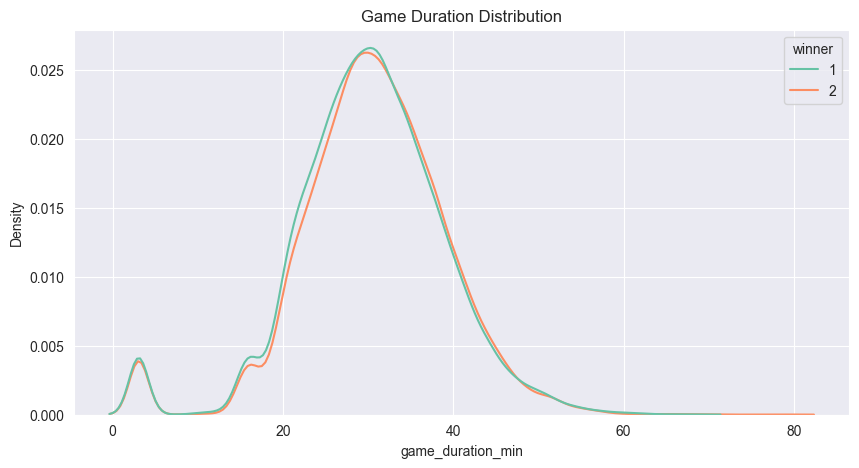

In [175]:
plt.figure(figsize=(10,5))
sns.kdeplot(x = "game_duration_min",data=df_exp ,hue="winner", palette="Set2")
plt.title("Game Duration Distribution")

In [195]:
# as we can see the distribution on time is pretty even for both teams
# and it seems this is a gaussian distribution
# However, there is weird bump at the 0-10 minutes mark
# This is because games that have afk player can default early without any point loss
index =  df_exp[df_exp["game_duration_min"]<15].index
df_exp.drop(index, inplace=True)
df_exp

,gameId,creationTime,gameDuration,winner,firstBlood,firstTower,firstInhibitor,firstBaron,firstDragon,firstRiftHerald,t1_champ1id,t1_champ1_sum1,t1_champ1_sum2,t1_champ2id,t1_champ2_sum1,t1_champ2_sum2,t1_champ3id,t1_champ3_sum1,t1_champ3_sum2,t1_champ4id,t1_champ4_sum1,t1_champ4_sum2,t1_champ5id,t1_champ5_sum1,t1_champ5_sum2,t1_towerKills,t1_inhibitorKills,t1_baronKills,t1_dragonKills,t1_riftHeraldKills,t1_ban1,t1_ban2,t1_ban3,t1_ban4,t1_ban5,t2_champ1id,t2_champ1_sum1,t2_champ1_sum2,t2_champ2id,t2_champ2_sum1,t2_champ2_sum2,t2_champ3id,t2_champ3_sum1,t2_champ3_sum2,t2_champ4id,t2_champ4_sum1,t2_champ4_sum2,t2_champ5id,t2_champ5_sum1,t2_champ5_sum2,t2_towerKills,t2_inhibitorKills,t2_baronKills,t2_dragonKills,t2_riftHeraldKills,t2_ban1,t2_ban2,t2_ban3,t2_ban4,t2_ban5,game_duration_min
0,3326086514,1504279457970,1949,1,2,1,1,1,1,2,8,12,4,432,3,4,96,4,7,11,11,6,112,4,14,11,1,2,3,0,92,40,69,119,141,104,11,4,498,4,7,122,6,4,238,14,4,412,4,3,5,0,0,1,1,114,67,43,16,51,32.0
1,3229566029,1497848803862,1851,1,1,1,1,0,1,1,119,7,4,39,12,4,76,4,3,10,4,14,35,4,11,10,4,0,2,1,51,122,17,498,19,54,4,12,25,4,14,120,11,4,157,4,14,92,4,7,2,0,0,0,0,11,67,238,51,420,31.0
2,3327363504,1504360103310,1493,1,2,1,1,1,2,0,18,4,7,141,11,4,267,3,4,68,4,12,38,12,4,8,1,1,1,0,117,40,29,16,53,69,4,7,412,14,4,126,4,12,24,4,11,22,7,4,2,0,0,1,0,157,238,121,57,28,25.0
3,3326856598,1504348503996,1758,1,1,1,1,1,1,0,57,4,12,63,4,14,29,4,7,61,4,1,36,11,4,9,2,1,2,0,238,67,516,114,31,90,14,4,19,11,4,412,4,3,92,4,14,22,4,7,0,0,0,0,0,164,18,141,40,51,29.0
4,3330080762,1504554410899,2094,1,2,1,1,1,1,0,19,4,12,29,11,4,40,4,3,119,4,7,134,7,4,9,2,1,3,0,90,64,412,25,31,37,3,4,59,4,12,141,11,4,38,4,12,51,4,7,3,0,0,1,0,86,11,201,122,18,35.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51485,3308904636,1503076540231,1944,2,1,2,2,0,2,0,19,12,4,429,4,7,91,4,14,432,4,14,64,4,11,2,0,0,0,0,114,18,11,157,497,45,12,4,83,12,4,67,4,7,40,3,4,79,11,4,10,2,0,4,0,55,-1,90,238,157,32.0
51486,3215685759,1496957179355,3304,2,1,1,2,2,2,2,90,4,14,32,4,11,31,12,4,412,14,4,18,4,7,5,4,0,2,0,157,164,122,99,420,102,11,4,429,7,4,89,3,4,75,4,12,45,14,4,11,7,4,4,1,157,55,119,154,105,55.0
51487,3322765040,1504029863961,2156,2,2,2,2,0,1,0,141,11,4,18,7,4,432,3,4,81,12,4,68,4,12,0,0,0,1,0,238,31,24,53,11,1,4,12,119,7,4,33,11,4,43,12,4,99,14,4,10,2,0,2,0,113,122,53,11,157,36.0
51488,3256675373,1499562036246,1475,2,2,2,2,0,2,0,121,11,4,236,4,7,420,4,12,201,4,3,99,4,14,0,0,0,0,0,119,64,51,157,29,21,7,4,56,4,12,25,4,14,30,12,4,11,11,4,11,3,0,1,0,154,39,51,90,114,25.0


Text(0.5, 1.0, 'Game Duration Distribution')

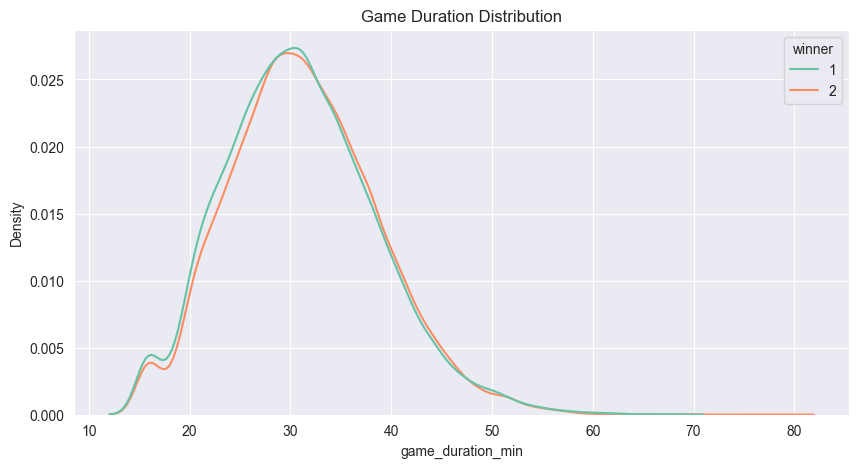

In [196]:
plt.figure(figsize=(10,5))
sns.kdeplot(x = "game_duration_min",data=df_exp ,hue="winner", palette="Set2")
plt.title("Game Duration Distribution")

In [169]:
df_exp.head()

,gameId,creationTime,gameDuration,winner,firstBlood,firstTower,firstInhibitor,firstBaron,firstDragon,firstRiftHerald,t1_champ1id,t1_champ1_sum1,t1_champ1_sum2,t1_champ2id,t1_champ2_sum1,t1_champ2_sum2,t1_champ3id,t1_champ3_sum1,t1_champ3_sum2,t1_champ4id,t1_champ4_sum1,t1_champ4_sum2,t1_champ5id,t1_champ5_sum1,t1_champ5_sum2,t1_towerKills,t1_inhibitorKills,t1_baronKills,t1_dragonKills,t1_riftHeraldKills,t1_ban1,t1_ban2,t1_ban3,t1_ban4,t1_ban5,t2_champ1id,t2_champ1_sum1,t2_champ1_sum2,t2_champ2id,t2_champ2_sum1,t2_champ2_sum2,t2_champ3id,t2_champ3_sum1,t2_champ3_sum2,t2_champ4id,t2_champ4_sum1,t2_champ4_sum2,t2_champ5id,t2_champ5_sum1,t2_champ5_sum2,t2_towerKills,t2_inhibitorKills,t2_baronKills,t2_dragonKills,t2_riftHeraldKills,t2_ban1,t2_ban2,t2_ban3,t2_ban4,t2_ban5,game_duration_min
0,3326086514,1504279457970,1949,1,2,1,1,1,1,2,8,12,4,432,3,4,96,4,7,11,11,6,112,4,14,11,1,2,3,0,92,40,69,119,141,104,11,4,498,4,7,122,6,4,238,14,4,412,4,3,5,0,0,1,1,114,67,43,16,51,32.0
1,3229566029,1497848803862,1851,1,1,1,1,0,1,1,119,7,4,39,12,4,76,4,3,10,4,14,35,4,11,10,4,0,2,1,51,122,17,498,19,54,4,12,25,4,14,120,11,4,157,4,14,92,4,7,2,0,0,0,0,11,67,238,51,420,31.0
2,3327363504,1504360103310,1493,1,2,1,1,1,2,0,18,4,7,141,11,4,267,3,4,68,4,12,38,12,4,8,1,1,1,0,117,40,29,16,53,69,4,7,412,14,4,126,4,12,24,4,11,22,7,4,2,0,0,1,0,157,238,121,57,28,25.0
3,3326856598,1504348503996,1758,1,1,1,1,1,1,0,57,4,12,63,4,14,29,4,7,61,4,1,36,11,4,9,2,1,2,0,238,67,516,114,31,90,14,4,19,11,4,412,4,3,92,4,14,22,4,7,0,0,0,0,0,164,18,141,40,51,29.0
4,3330080762,1504554410899,2094,1,2,1,1,1,1,0,19,4,12,29,11,4,40,4,3,119,4,7,134,7,4,9,2,1,3,0,90,64,412,25,31,37,3,4,59,4,12,141,11,4,38,4,12,51,4,7,3,0,0,1,0,86,11,201,122,18,35.0


In [164]:
# which champs are the most banned?
banned_champ = ["t1_ban1", "t1_ban2", "t1_ban3", "t1_ban4", "t1_ban5", "t2_ban1", "t2_ban2", "t2_ban3", "t2_ban4", "t2_ban5"]

most_banned_champs = df_exp[banned_champ].stack().value_counts()
most_banned_champs


157    33015
238    25393
31     25175
122    22870
40     21390
119    20262
53     18795
141    17384
29     15832
154    15786
114    14855
117    13461
105    13291
18     13067
11     11199
51     10248
67      9026
75      8026
57      7320
64      6516
55      6347
498     6274
23      5891
412     5867
516     5685
19      5667
90      5480
38      5280
113     5231
24      4934
16      4796
134     4543
84      4501
103     4481
92      4400
6       4229
17      3956
       ...  
268      419
161      417
102      387
20       384
2        377
62       355
68       335
421      324
15       304
133      298
56       287
9        286
4        284
115      272
163      262
267      245
98       244
48       238
76       232
82       227
104      224
101      219
43       215
44       210
111      195
127      188
26       184
106      183
78       161
203      158
110      142
30       131
112      128
14       117
13        96
77        90
72        70
Length: 139, dtype: int64

In [169]:
# let's concat the most banned champs with the champInfo dataframe
# however let's first reset the index in order to make the merge easier
# most_banned_champs = most_banned_champs.to_frame().reset_index()
most_banned_champs.rename(columns={"index": "id", 0: "count"}, inplace=True)

most_banned_champs

,id,count
0,157,33015
1,238,25393
2,31,25175
3,122,22870
4,40,21390
5,119,20262
6,53,18795
7,141,17384
8,29,15832
9,154,15786


In [170]:
# let's merge the two dataframes
most_banned_champs = most_banned_champs.merge(champInfo, on="id", how="left")
most_banned_champs.drop(["title", "key"], inplace=True, axis=1)
most_banned_champs

,id,count,tags,name
0,157,33015,"[Fighter, Assassin]",Yasuo
1,238,25393,"[Assassin, Fighter]",Zed
2,31,25175,"[Tank, Mage]",Cho'Gath
3,122,22870,"[Fighter, Tank]",Darius
4,40,21390,"[Support, Mage]",Janna
5,119,20262,[Marksman],Draven
6,53,18795,"[Tank, Fighter]",Blitzcrank
7,141,17384,"[Fighter, Assassin]",Kayn
8,29,15832,"[Marksman, Assassin]",Twitch
9,154,15786,"[Tank, Fighter]",Zac


Rectangle(xy=(-0.4, 0), width=0.8, height=33015, angle=0)
Rectangle(xy=(0.6, 0), width=0.8, height=25393, angle=0)
Rectangle(xy=(1.6, 0), width=0.8, height=25175, angle=0)
Rectangle(xy=(2.6, 0), width=0.8, height=22870, angle=0)
Rectangle(xy=(3.6, 0), width=0.8, height=21390, angle=0)
Rectangle(xy=(4.6, 0), width=0.8, height=20262, angle=0)
Rectangle(xy=(5.6, 0), width=0.8, height=18795, angle=0)
Rectangle(xy=(6.6, 0), width=0.8, height=17384, angle=0)
Rectangle(xy=(7.6, 0), width=0.8, height=15832, angle=0)
Rectangle(xy=(8.6, 0), width=0.8, height=15786, angle=0)


Text(0.5, 1.0, '10-Most Banned Champions')

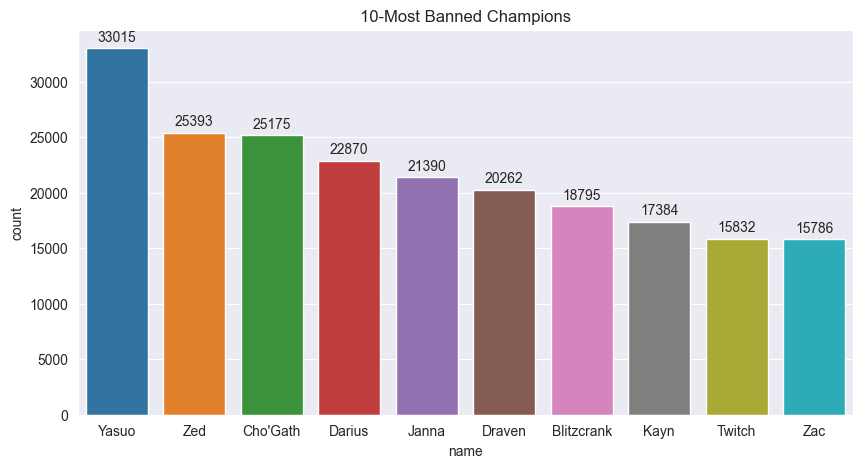

In [202]:
# Let's draw a barplot
plt.figure(figsize=(10,5))
ax = sns.barplot(x="name", y="count", data=most_banned_champs.nlargest(10, "count"))
ax.bar_label(ax.containers[0], fmt='%.0f', padding=3)
plt.title("10-Most Banned Champions")


In [44]:
# it seems Yasuo is the most banned champion
# nobody likes Yasuo

# Let's prepare our dataset for modelling section

In [269]:
df_mdl = df_exp.copy()

In [239]:
# champInfo.set_index("id", inplace=True)
champInfo

,tags,title,key,name
id,,,,
266,"[Fighter, Tank]",the Darkin Blade,Aatrox,Aatrox
103,"[Mage, Assassin]",the Nine-Tailed Fox,Ahri,Ahri
84,[Assassin],the Fist of Shadow,Akali,Akali
12,"[Tank, Support]",the Minotaur,Alistar,Alistar
32,"[Tank, Mage]",the Sad Mummy,Amumu,Amumu
...,...,...,...,...
154,"[Tank, Fighter]",the Secret Weapon,Zac,Zac
238,"[Assassin, Fighter]",the Master of Shadows,Zed,Zed
115,[Mage],the Hexplosives Expert,Ziggs,Ziggs


In [240]:
# from id to name

def id_to_tags(id):
    return champInfo.loc[id]["tags"]

df_mdl["t1_champ1id"].apply(id_to_tags)

0                [Mage, Tank]
1                  [Marksman]
2        [Marksman, Assassin]
3                [Tank, Mage]
4             [Fighter, Tank]
                 ...         
51485         [Fighter, Tank]
51486        [Mage, Assassin]
51487     [Fighter, Assassin]
51488     [Assassin, Fighter]
51489         [Tank, Support]
Name: t1_champ1id, Length: 50201, dtype: object

In [270]:
champ_picks = ["t1_champ1id", "t1_champ2id", "t1_champ3id", "t1_champ4id", "t1_champ5id", "t2_champ1id", "t2_champ2id", "t2_champ3id", "t2_champ4id", "t2_champ5id"]

df_mdl_tags = df_mdl[champ_picks].applymap(id_to_tags)
df_mdl_tags

,t1_champ1id,t1_champ2id,t1_champ3id,t1_champ4id,t1_champ5id,t2_champ1id,t2_champ2id,t2_champ3id,t2_champ4id,t2_champ5id
0,"[Mage, Tank]","[Support, Mage]","[Marksman, Mage]","[Assassin, Fighter]",[Mage],[Marksman],[Marksman],"[Fighter, Tank]","[Assassin, Fighter]","[Support, Fighter]"
1,[Marksman],"[Fighter, Assassin]","[Assassin, Fighter]","[Fighter, Support]",[Assassin],"[Tank, Fighter]","[Mage, Support]","[Fighter, Tank]","[Fighter, Assassin]","[Fighter, Assassin]"
2,"[Marksman, Assassin]","[Fighter, Assassin]","[Support, Mage]","[Fighter, Mage]","[Assassin, Mage]",[Mage],"[Support, Fighter]","[Fighter, Marksman]","[Fighter, Assassin]","[Marksman, Support]"
3,"[Tank, Mage]",[Mage],"[Marksman, Assassin]","[Mage, Support]","[Fighter, Tank]","[Mage, Assassin]","[Fighter, Tank]","[Support, Fighter]","[Fighter, Assassin]","[Marksman, Support]"
4,"[Fighter, Tank]","[Marksman, Assassin]","[Support, Mage]",[Marksman],"[Mage, Support]","[Support, Mage]","[Tank, Fighter]","[Fighter, Assassin]","[Assassin, Mage]",[Marksman]
...,...,...,...,...,...,...,...,...,...,...
51485,"[Fighter, Tank]",[Marksman],"[Assassin, Fighter]","[Support, Mage]","[Fighter, Assassin]",[Mage],"[Fighter, Tank]","[Marksman, Assassin]","[Support, Mage]","[Fighter, Mage]"
51486,"[Mage, Assassin]","[Tank, Mage]","[Tank, Mage]","[Support, Fighter]","[Marksman, Assassin]","[Fighter, Tank]",[Marksman],"[Tank, Support]","[Fighter, Tank]",[Mage]
51487,"[Fighter, Assassin]","[Marksman, Assassin]","[Support, Mage]","[Marksman, Mage]","[Fighter, Mage]",[Mage],[Marksman],"[Tank, Fighter]","[Mage, Support]","[Mage, Support]"
51488,"[Assassin, Fighter]",[Marksman],"[Fighter, Tank]","[Support, Tank]","[Mage, Support]",[Marksman],"[Assassin, Fighter]","[Mage, Support]",[Mage],"[Assassin, Fighter]"


In [271]:
df_mdl_tags_t1 = df_mdl_tags.iloc[:, :5]
df_mdl_tags_t2 = df_mdl_tags.iloc[:, 5:]
df_mdl_tags_t1

,t1_champ1id,t1_champ2id,t1_champ3id,t1_champ4id,t1_champ5id
0,"[Mage, Tank]","[Support, Mage]","[Marksman, Mage]","[Assassin, Fighter]",[Mage]
1,[Marksman],"[Fighter, Assassin]","[Assassin, Fighter]","[Fighter, Support]",[Assassin]
2,"[Marksman, Assassin]","[Fighter, Assassin]","[Support, Mage]","[Fighter, Mage]","[Assassin, Mage]"
3,"[Tank, Mage]",[Mage],"[Marksman, Assassin]","[Mage, Support]","[Fighter, Tank]"
4,"[Fighter, Tank]","[Marksman, Assassin]","[Support, Mage]",[Marksman],"[Mage, Support]"
...,...,...,...,...,...
51485,"[Fighter, Tank]",[Marksman],"[Assassin, Fighter]","[Support, Mage]","[Fighter, Assassin]"
51486,"[Mage, Assassin]","[Tank, Mage]","[Tank, Mage]","[Support, Fighter]","[Marksman, Assassin]"
51487,"[Fighter, Assassin]","[Marksman, Assassin]","[Support, Mage]","[Marksman, Mage]","[Fighter, Mage]"
51488,"[Assassin, Fighter]",[Marksman],"[Fighter, Tank]","[Support, Tank]","[Mage, Support]"


In [272]:
# Create a function to count the occurrences of each value in a list
def count_values(lst, value):
    return lst.count(value)





def tags_encoding(df, team):
    # we have concatenate all the lists in a row
    df = df.sum(axis=1)
    #let's convert it into a df because in the summation part it got series type
    df = pd.DataFrame(df)
    df.columns = [f"{team}tags"]
    
    # Create a list of unique values from all the lists in the column
    unique_values = list(set([value for sublist in df[f"{team}tags"] for value in sublist]))

    # Create new columns based on the unique values
    for value in unique_values:
        df[team+value] = df[f"{team}tags"].apply(count_values, args=(value,))
        
    return df

df_t1_encoded = tags_encoding(df_mdl_tags_t1, "t1")
df_t2_encoded = tags_encoding(df_mdl_tags_t2, "t2")
    
        
    

In [273]:
df_t1_encoded

,t1tags,t1Mage,t1Marksman,t1Fighter,t1Support,t1Assassin,t1Tank
0,"[Mage, Tank, Support, Mage, Marksman, Mage, As...",4,1,1,1,1,1
1,"[Marksman, Fighter, Assassin, Assassin, Fighte...",0,1,3,1,3,0
2,"[Marksman, Assassin, Fighter, Assassin, Suppor...",3,1,2,1,3,0
3,"[Tank, Mage, Mage, Marksman, Assassin, Mage, S...",3,1,1,1,1,2
4,"[Fighter, Tank, Marksman, Assassin, Support, M...",2,2,1,2,1,1
...,...,...,...,...,...,...,...
51485,"[Fighter, Tank, Marksman, Assassin, Fighter, S...",1,1,3,1,2,1
51486,"[Mage, Assassin, Tank, Mage, Tank, Mage, Suppo...",3,1,1,1,2,2
51487,"[Fighter, Assassin, Marksman, Assassin, Suppor...",3,2,2,1,2,0
51488,"[Assassin, Fighter, Marksman, Fighter, Tank, S...",1,1,2,2,1,2


In [274]:
df_t2_encoded

,t2tags,t2Mage,t2Marksman,t2Fighter,t2Support,t2Assassin,t2Tank
0,"[Marksman, Marksman, Fighter, Tank, Assassin, ...",0,2,3,1,1,1
1,"[Tank, Fighter, Mage, Support, Fighter, Tank, ...",1,0,4,1,2,2
2,"[Mage, Support, Fighter, Fighter, Marksman, Fi...",1,2,3,2,1,0
3,"[Mage, Assassin, Fighter, Tank, Support, Fight...",1,1,3,2,2,1
4,"[Support, Mage, Tank, Fighter, Fighter, Assass...",2,1,2,1,2,1
...,...,...,...,...,...,...,...
51485,"[Mage, Fighter, Tank, Marksman, Assassin, Supp...",3,1,2,1,1,1
51486,"[Fighter, Tank, Marksman, Tank, Support, Fight...",1,1,2,1,0,3
51487,"[Mage, Marksman, Tank, Fighter, Mage, Support,...",3,1,1,2,0,1
51488,"[Marksman, Assassin, Fighter, Mage, Support, M...",2,1,2,1,2,0


In [275]:
df_teams_encoded = pd.concat([df_t1_encoded, df_t2_encoded], axis=1)
df_teams_encoded

,t1tags,t1Mage,t1Marksman,t1Fighter,t1Support,t1Assassin,t1Tank,t2tags,t2Mage,t2Marksman,t2Fighter,t2Support,t2Assassin,t2Tank
0,"[Mage, Tank, Support, Mage, Marksman, Mage, As...",4,1,1,1,1,1,"[Marksman, Marksman, Fighter, Tank, Assassin, ...",0,2,3,1,1,1
1,"[Marksman, Fighter, Assassin, Assassin, Fighte...",0,1,3,1,3,0,"[Tank, Fighter, Mage, Support, Fighter, Tank, ...",1,0,4,1,2,2
2,"[Marksman, Assassin, Fighter, Assassin, Suppor...",3,1,2,1,3,0,"[Mage, Support, Fighter, Fighter, Marksman, Fi...",1,2,3,2,1,0
3,"[Tank, Mage, Mage, Marksman, Assassin, Mage, S...",3,1,1,1,1,2,"[Mage, Assassin, Fighter, Tank, Support, Fight...",1,1,3,2,2,1
4,"[Fighter, Tank, Marksman, Assassin, Support, M...",2,2,1,2,1,1,"[Support, Mage, Tank, Fighter, Fighter, Assass...",2,1,2,1,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51485,"[Fighter, Tank, Marksman, Assassin, Fighter, S...",1,1,3,1,2,1,"[Mage, Fighter, Tank, Marksman, Assassin, Supp...",3,1,2,1,1,1
51486,"[Mage, Assassin, Tank, Mage, Tank, Mage, Suppo...",3,1,1,1,2,2,"[Fighter, Tank, Marksman, Tank, Support, Fight...",1,1,2,1,0,3
51487,"[Fighter, Assassin, Marksman, Assassin, Suppor...",3,2,2,1,2,0,"[Mage, Marksman, Tank, Fighter, Mage, Support,...",3,1,1,2,0,1
51488,"[Assassin, Fighter, Marksman, Fighter, Tank, S...",1,1,2,2,1,2,"[Marksman, Assassin, Fighter, Mage, Support, M...",2,1,2,1,2,0


As we can see, we have encoded the tags of the each team's member's champion.
# So far, so good

In [276]:
# let's now drop the t1tags and t2tags columns since we don't need them anymore
df_teams_encoded.drop(["t1tags", "t2tags"], inplace=True, axis=1)
df_teams_encoded

,t1Mage,t1Marksman,t1Fighter,t1Support,t1Assassin,t1Tank,t2Mage,t2Marksman,t2Fighter,t2Support,t2Assassin,t2Tank
0,4,1,1,1,1,1,0,2,3,1,1,1
1,0,1,3,1,3,0,1,0,4,1,2,2
2,3,1,2,1,3,0,1,2,3,2,1,0
3,3,1,1,1,1,2,1,1,3,2,2,1
4,2,2,1,2,1,1,2,1,2,1,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
51485,1,1,3,1,2,1,3,1,2,1,1,1
51486,3,1,1,1,2,2,1,1,2,1,0,3
51487,3,2,2,1,2,0,3,1,1,2,0,1
51488,1,1,2,2,1,2,2,1,2,1,2,0


In [277]:
# let's concat the encoded df with the original df

df_mdl = pd.concat([df_mdl, df_teams_encoded], axis=1)


In [263]:
df_mdl.columns 

Index(['gameId', 'creationTime', 'gameDuration', 'winner', 'firstBlood',
       'firstTower', 'firstInhibitor', 'firstBaron', 'firstDragon',
       'firstRiftHerald', 't1_champ1id', 't1_champ1_sum1', 't1_champ1_sum2',
       't1_champ2id', 't1_champ2_sum1', 't1_champ2_sum2', 't1_champ3id',
       't1_champ3_sum1', 't1_champ3_sum2', 't1_champ4id', 't1_champ4_sum1',
       't1_champ4_sum2', 't1_champ5id', 't1_champ5_sum1', 't1_champ5_sum2',
       't1_towerKills', 't1_inhibitorKills', 't1_baronKills', 't1_dragonKills',
       't1_riftHeraldKills', 't1_ban1', 't1_ban2', 't1_ban3', 't1_ban4',
       't1_ban5', 't2_champ1id', 't2_champ1_sum1', 't2_champ1_sum2',
       't2_champ2id', 't2_champ2_sum1', 't2_champ2_sum2', 't2_champ3id',
       't2_champ3_sum1', 't2_champ3_sum2', 't2_champ4id', 't2_champ4_sum1',
       't2_champ4_sum2', 't2_champ5id', 't2_champ5_sum1', 't2_champ5_sum2',
       't2_towerKills', 't2_inhibitorKills', 't2_baronKills', 't2_dragonKills',
       't2_riftHeraldKills', '

In [278]:
df_mdl['creationTime'] = pd.to_datetime(df_mdl['creationTime'], unit='ms')

df_mdl['day_of_week'] = df_mdl['creationTime'].dt.day_name()
df_mdl.drop("game_duration_min", inplace=True, axis=1)
df_mdl

,gameId,creationTime,gameDuration,winner,firstBlood,firstTower,firstInhibitor,firstBaron,firstDragon,firstRiftHerald,t1_champ1id,t1_champ1_sum1,t1_champ1_sum2,t1_champ2id,t1_champ2_sum1,t1_champ2_sum2,t1_champ3id,t1_champ3_sum1,t1_champ3_sum2,t1_champ4id,t1_champ4_sum1,t1_champ4_sum2,t1_champ5id,t1_champ5_sum1,t1_champ5_sum2,t1_towerKills,t1_inhibitorKills,t1_baronKills,t1_dragonKills,t1_riftHeraldKills,t1_ban1,t1_ban2,t1_ban3,t1_ban4,t1_ban5,t2_champ1id,t2_champ1_sum1,t2_champ1_sum2,t2_champ2id,t2_champ2_sum1,t2_champ2_sum2,t2_champ3id,t2_champ3_sum1,t2_champ3_sum2,t2_champ4id,t2_champ4_sum1,t2_champ4_sum2,t2_champ5id,t2_champ5_sum1,t2_champ5_sum2,t2_towerKills,t2_inhibitorKills,t2_baronKills,t2_dragonKills,t2_riftHeraldKills,t2_ban1,t2_ban2,t2_ban3,t2_ban4,t2_ban5,t1Mage,t1Marksman,t1Fighter,t1Support,t1Assassin,t1Tank,t2Mage,t2Marksman,t2Fighter,t2Support,t2Assassin,t2Tank,day_of_week
0,3326086514,2017-09-01 15:24:17.970,1949,1,2,1,1,1,1,2,8,12,4,432,3,4,96,4,7,11,11,6,112,4,14,11,1,2,3,0,92,40,69,119,141,104,11,4,498,4,7,122,6,4,238,14,4,412,4,3,5,0,0,1,1,114,67,43,16,51,4,1,1,1,1,1,0,2,3,1,1,1,Friday
1,3229566029,2017-06-19 05:06:43.862,1851,1,1,1,1,0,1,1,119,7,4,39,12,4,76,4,3,10,4,14,35,4,11,10,4,0,2,1,51,122,17,498,19,54,4,12,25,4,14,120,11,4,157,4,14,92,4,7,2,0,0,0,0,11,67,238,51,420,0,1,3,1,3,0,1,0,4,1,2,2,Monday
2,3327363504,2017-09-02 13:48:23.310,1493,1,2,1,1,1,2,0,18,4,7,141,11,4,267,3,4,68,4,12,38,12,4,8,1,1,1,0,117,40,29,16,53,69,4,7,412,14,4,126,4,12,24,4,11,22,7,4,2,0,0,1,0,157,238,121,57,28,3,1,2,1,3,0,1,2,3,2,1,0,Saturday
3,3326856598,2017-09-02 10:35:03.996,1758,1,1,1,1,1,1,0,57,4,12,63,4,14,29,4,7,61,4,1,36,11,4,9,2,1,2,0,238,67,516,114,31,90,14,4,19,11,4,412,4,3,92,4,14,22,4,7,0,0,0,0,0,164,18,141,40,51,3,1,1,1,1,2,1,1,3,2,2,1,Saturday
4,3330080762,2017-09-04 19:46:50.899,2094,1,2,1,1,1,1,0,19,4,12,29,11,4,40,4,3,119,4,7,134,7,4,9,2,1,3,0,90,64,412,25,31,37,3,4,59,4,12,141,11,4,38,4,12,51,4,7,3,0,0,1,0,86,11,201,122,18,2,2,1,2,1,1,2,1,2,1,2,1,Monday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51485,3308904636,2017-08-18 17:15:40.231,1944,2,1,2,2,0,2,0,19,12,4,429,4,7,91,4,14,432,4,14,64,4,11,2,0,0,0,0,114,18,11,157,497,45,12,4,83,12,4,67,4,7,40,3,4,79,11,4,10,2,0,4,0,55,-1,90,238,157,1,1,3,1,2,1,3,1,2,1,1,1,Friday
51486,3215685759,2017-06-08 21:26:19.355,3304,2,1,1,2,2,2,2,90,4,14,32,4,11,31,12,4,412,14,4,18,4,7,5,4,0,2,0,157,164,122,99,420,102,11,4,429,7,4,89,3,4,75,4,12,45,14,4,11,7,4,4,1,157,55,119,154,105,3,1,1,1,2,2,1,1,2,1,0,3,Thursday
51487,3322765040,2017-08-29 18:04:23.961,2156,2,2,2,2,0,1,0,141,11,4,18,7,4,432,3,4,81,12,4,68,4,12,0,0,0,1,0,238,31,24,53,11,1,4,12,119,7,4,33,11,4,43,12,4,99,14,4,10,2,0,2,0,113,122,53,11,157,3,2,2,1,2,0,3,1,1,2,0,1,Tuesday
51488,3256675373,2017-07-09 01:00:36.246,1475,2,2,2,2,0,2,0,121,11,4,236,4,7,420,4,12,201,4,3,99,4,14,0,0,0,0,0,119,64,51,157,29,21,7,4,56,4,12,25,4,14,30,12,4,11,11,4,11,3,0,1,0,154,39,51,90,114,1,1,2,2,1,2,2,1,2,1,2,0,Sunday


In [287]:
# One hot encoding the time of the game
from sklearn.preprocessing import OneHotEncoder

# initialize the OneHotEncoder
encoder = OneHotEncoder(handle_unknown='ignore')

one_hot_encoded = pd.DataFrame(encoder.fit_transform(df_mdl[["day_of_week"]]).toarray())

one_hot_encoded.columns = encoder.get_feature_names_out(["day_of_week"])
df_mdl = df_mdl.join(one_hot_encoded)
df_mdl

,gameId,creationTime,gameDuration,winner,firstBlood,firstTower,firstInhibitor,firstBaron,firstDragon,firstRiftHerald,t1_champ1id,t1_champ1_sum1,t1_champ1_sum2,t1_champ2id,t1_champ2_sum1,t1_champ2_sum2,t1_champ3id,t1_champ3_sum1,t1_champ3_sum2,t1_champ4id,t1_champ4_sum1,t1_champ4_sum2,t1_champ5id,t1_champ5_sum1,t1_champ5_sum2,t1_towerKills,t1_inhibitorKills,t1_baronKills,t1_dragonKills,t1_riftHeraldKills,t1_ban1,t1_ban2,t1_ban3,t1_ban4,t1_ban5,t2_champ1id,t2_champ1_sum1,...,t2_champ3_sum2,t2_champ4id,t2_champ4_sum1,t2_champ4_sum2,t2_champ5id,t2_champ5_sum1,t2_champ5_sum2,t2_towerKills,t2_inhibitorKills,t2_baronKills,t2_dragonKills,t2_riftHeraldKills,t2_ban1,t2_ban2,t2_ban3,t2_ban4,t2_ban5,t1Mage,t1Marksman,t1Fighter,t1Support,t1Assassin,t1Tank,t2Mage,t2Marksman,t2Fighter,t2Support,t2Assassin,t2Tank,day_of_week,day_of_week_Friday,day_of_week_Monday,day_of_week_Saturday,day_of_week_Sunday,day_of_week_Thursday,day_of_week_Tuesday,day_of_week_Wednesday
0,3326086514,2017-09-01 15:24:17.970,1949,1,2,1,1,1,1,2,8,12,4,432,3,4,96,4,7,11,11,6,112,4,14,11,1,2,3,0,92,40,69,119,141,104,11,...,4,238,14,4,412,4,3,5,0,0,1,1,114,67,43,16,51,4,1,1,1,1,1,0,2,3,1,1,1,Friday,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,3229566029,2017-06-19 05:06:43.862,1851,1,1,1,1,0,1,1,119,7,4,39,12,4,76,4,3,10,4,14,35,4,11,10,4,0,2,1,51,122,17,498,19,54,4,...,4,157,4,14,92,4,7,2,0,0,0,0,11,67,238,51,420,0,1,3,1,3,0,1,0,4,1,2,2,Monday,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,3327363504,2017-09-02 13:48:23.310,1493,1,2,1,1,1,2,0,18,4,7,141,11,4,267,3,4,68,4,12,38,12,4,8,1,1,1,0,117,40,29,16,53,69,4,...,12,24,4,11,22,7,4,2,0,0,1,0,157,238,121,57,28,3,1,2,1,3,0,1,2,3,2,1,0,Saturday,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,3326856598,2017-09-02 10:35:03.996,1758,1,1,1,1,1,1,0,57,4,12,63,4,14,29,4,7,61,4,1,36,11,4,9,2,1,2,0,238,67,516,114,31,90,14,...,3,92,4,14,22,4,7,0,0,0,0,0,164,18,141,40,51,3,1,1,1,1,2,1,1,3,2,2,1,Saturday,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,3330080762,2017-09-04 19:46:50.899,2094,1,2,1,1,1,1,0,19,4,12,29,11,4,40,4,3,119,4,7,134,7,4,9,2,1,3,0,90,64,412,25,31,37,3,...,4,38,4,12,51,4,7,3,0,0,1,0,86,11,201,122,18,2,2,1,2,1,1,2,1,2,1,2,1,Monday,0.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51485,3308904636,2017-08-18 17:15:40.231,1944,2,1,2,2,0,2,0,19,12,4,429,4,7,91,4,14,432,4,14,64,4,11,2,0,0,0,0,114,18,11,157,497,45,12,...,7,40,3,4,79,11,4,10,2,0,4,0,55,-1,90,238,157,1,1,3,1,2,1,3,1,2,1,1,1,Friday,NaN,NaN,NaN,NaN,NaN,NaN,NaN
51486,3215685759,2017-06-08 21:26:19.355,3304,2,1,1,2,2,2,2,90,4,14,32,4,11,31,12,4,412,14,4,18,4,7,5,4,0,2,0,157,164,122,99,420,102,11,...,4,75,4,12,45,14,4,11,7,4,4,1,157,55,119,154,105,3,1,1,1,2,2,1,1,2,1,0,3,Thursday,NaN,NaN,NaN,NaN,NaN,NaN,NaN
51487,3322765040,2017-08-29 18:04:23.961,2156,2,2,2,2,0,1,0,141,11,4,18,7,4,432,3,4,81,12,4,68,4,12,0,0,0,1,0,238,31,24,53,11,1,4,...,4,43,12,4,99,14,4,10,2,0,2,0,113,122,53,11,157,3,2,2,1,2,0,3,1,1,2,0,1,Tuesday,NaN,NaN,NaN,NaN,NaN,NaN,NaN
51488,3256675373,2017-07-09 01:00:36.246,1475,2,2,2,2,0,2,0,121,11,4,236,4,7,420,4,12,201,4,3,99,4,14,0,0,0,0,0,119,64,51,157,29,21,7,...,14,30,12,4,11,11,4,11,3,0,1,0,154,39,51,90,114,1,1,2,2,1,2,2,1,2,1,2,0,Sunday,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [288]:
# let's drop the day_of_week column since we don't need it anymore
# and drop the other useless columns

df_mdl.drop(["creationTime", "gameId", "day_of_week"], inplace=True, axis=1)
df_mdl


,gameDuration,winner,firstBlood,firstTower,firstInhibitor,firstBaron,firstDragon,firstRiftHerald,t1_champ1id,t1_champ1_sum1,t1_champ1_sum2,t1_champ2id,t1_champ2_sum1,t1_champ2_sum2,t1_champ3id,t1_champ3_sum1,t1_champ3_sum2,t1_champ4id,t1_champ4_sum1,t1_champ4_sum2,t1_champ5id,t1_champ5_sum1,t1_champ5_sum2,t1_towerKills,t1_inhibitorKills,t1_baronKills,t1_dragonKills,t1_riftHeraldKills,t1_ban1,t1_ban2,t1_ban3,t1_ban4,t1_ban5,t2_champ1id,t2_champ1_sum1,t2_champ1_sum2,t2_champ2id,...,t2_champ3_sum1,t2_champ3_sum2,t2_champ4id,t2_champ4_sum1,t2_champ4_sum2,t2_champ5id,t2_champ5_sum1,t2_champ5_sum2,t2_towerKills,t2_inhibitorKills,t2_baronKills,t2_dragonKills,t2_riftHeraldKills,t2_ban1,t2_ban2,t2_ban3,t2_ban4,t2_ban5,t1Mage,t1Marksman,t1Fighter,t1Support,t1Assassin,t1Tank,t2Mage,t2Marksman,t2Fighter,t2Support,t2Assassin,t2Tank,day_of_week_Friday,day_of_week_Monday,day_of_week_Saturday,day_of_week_Sunday,day_of_week_Thursday,day_of_week_Tuesday,day_of_week_Wednesday
0,1949,1,2,1,1,1,1,2,8,12,4,432,3,4,96,4,7,11,11,6,112,4,14,11,1,2,3,0,92,40,69,119,141,104,11,4,498,...,6,4,238,14,4,412,4,3,5,0,0,1,1,114,67,43,16,51,4,1,1,1,1,1,0,2,3,1,1,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1851,1,1,1,1,0,1,1,119,7,4,39,12,4,76,4,3,10,4,14,35,4,11,10,4,0,2,1,51,122,17,498,19,54,4,12,25,...,11,4,157,4,14,92,4,7,2,0,0,0,0,11,67,238,51,420,0,1,3,1,3,0,1,0,4,1,2,2,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,1493,1,2,1,1,1,2,0,18,4,7,141,11,4,267,3,4,68,4,12,38,12,4,8,1,1,1,0,117,40,29,16,53,69,4,7,412,...,4,12,24,4,11,22,7,4,2,0,0,1,0,157,238,121,57,28,3,1,2,1,3,0,1,2,3,2,1,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,1758,1,1,1,1,1,1,0,57,4,12,63,4,14,29,4,7,61,4,1,36,11,4,9,2,1,2,0,238,67,516,114,31,90,14,4,19,...,4,3,92,4,14,22,4,7,0,0,0,0,0,164,18,141,40,51,3,1,1,1,1,2,1,1,3,2,2,1,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,2094,1,2,1,1,1,1,0,19,4,12,29,11,4,40,4,3,119,4,7,134,7,4,9,2,1,3,0,90,64,412,25,31,37,3,4,59,...,11,4,38,4,12,51,4,7,3,0,0,1,0,86,11,201,122,18,2,2,1,2,1,1,2,1,2,1,2,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51485,1944,2,1,2,2,0,2,0,19,12,4,429,4,7,91,4,14,432,4,14,64,4,11,2,0,0,0,0,114,18,11,157,497,45,12,4,83,...,4,7,40,3,4,79,11,4,10,2,0,4,0,55,-1,90,238,157,1,1,3,1,2,1,3,1,2,1,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
51486,3304,2,1,1,2,2,2,2,90,4,14,32,4,11,31,12,4,412,14,4,18,4,7,5,4,0,2,0,157,164,122,99,420,102,11,4,429,...,3,4,75,4,12,45,14,4,11,7,4,4,1,157,55,119,154,105,3,1,1,1,2,2,1,1,2,1,0,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
51487,2156,2,2,2,2,0,1,0,141,11,4,18,7,4,432,3,4,81,12,4,68,4,12,0,0,0,1,0,238,31,24,53,11,1,4,12,119,...,11,4,43,12,4,99,14,4,10,2,0,2,0,113,122,53,11,157,3,2,2,1,2,0,3,1,1,2,0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
51488,1475,2,2,2,2,0,2,0,121,11,4,236,4,7,420,4,12,201,4,3,99,4,14,0,0,0,0,0,119,64,51,157,29,21,7,4,56,...,4,14,30,12,4,11,11,4,11,3,0,1,0,154,39,51,90,114,1,1,2,2,1,2,2,1,2,1,2,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [132]:
# Let's split our data into train and test sets
from sklearn.model_selection import train_test_split
X = df_mdl.drop(["winner"], axis=1)
y  = df_mdl["winner"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [289]:
# let's implement Decision Tree Classifier
 
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)

print("Score on test data")
print(dtc.score(X_test, y_test))
print("Score on train data ")
print(dtc.score(X_train, y_train))


Score on test data
0.9570790444746553
Score on train data 
1.0


In [142]:
# let's try the gradient boosting classifier
from sklearn.ensemble import GradientBoostingClassifier

gbc = GradientBoostingClassifier()

gbc.fit(X_train, y_train)

print("Score on test data")
print(gbc.score(X_test, y_test))
print("Score on train data ")
print(gbc.score(X_train, y_train))


Score on test data
0.9697999611575063
Score on train data 
0.9741940182559721


In [143]:
# hyperparameter tunning

from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.metrics import accuracy_score

# Define the parameter grid to search
param_grid = {
    'learning_rate': [0.05, 0.1, 0.2],
    'max_depth': [3, 4, 5],
    'n_estimators': [50, 100, 200]
}

# Create a GradientBoostingClassifier
gb = GradientBoostingClassifier()

# Create a GridSearchCV object
grid_search = GridSearchCV(
    estimator=gb,
    param_grid=param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1
)

# Fit the GridSearchCV object to the data
grid_search.fit(X_train, y_train)

# Print the best hyperparameters
print(grid_search.best_params_)

# Create a GradientBoostingClassifier with the best hyperparameters
best_gb = GradientBoostingClassifier(**grid_search.best_params_)

# Evaluate the best GradientBoostingClassifier with cross_val_score
scores = cross_val_score(
    estimator=best_gb,
    X=X_train,
    y=y_train,
    cv=5,
    scoring='accuracy',
    n_jobs=-1
)

# Print the mean accuracy score and standard deviation
print("Accuracy: {:.4f} (+/- {:.4f})".format(scores.mean(), scores.std()))


{'learning_rate': 0.05, 'max_depth': 5, 'n_estimators': 200}
Accuracy: 0.9720 (+/- 0.0018)


In [144]:
# Here is another hyperparameter tunning method for decision tree classifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score


# Define the hyperparameters to tune
param_grid = {
    'max_depth': [2, 3, 4, 5],
    'min_samples_split': [2, 3, 4],
    'min_samples_leaf': [1, 2, 3]
}

# Create the decision tree classifier object
dt = DecisionTreeClassifier()

# Create the GridSearchCV object
grid_search = GridSearchCV(dt, param_grid, cv=5)

# Fit the GridSearchCV object to the data
grid_search.fit(X_train, y_train)

# Get the best hyperparameters and the corresponding score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

# Create the decision tree classifier object with the best hyperparameters
dt_best = DecisionTreeClassifier(**best_params)

# Calculate the cross-validation score
cv_score = cross_val_score(dt_best, X_train, y_train, cv=5)

# Print the results
print(f'Best hyperparameters: {best_params}')
print(f'Best score: {best_score:.2f}')
print(f'Cross-validation score: {cv_score.mean():.2f}')


Best hyperparameters: {'max_depth': 5, 'min_samples_leaf': 2, 'min_samples_split': 2}
Best score: 0.96
Cross-validation score: 0.96
